In [1]:
import json
import random
from pathlib import Path

from PIL import Image, ImageDraw

In [2]:
annos = json.loads(Path('webapp/static/img/_annotations.coco.json').read_text())

In [3]:
categories = annos['categories']
categories = {cate['id']: cate['name'] for cate in categories}

In [4]:
# Copy over the list the images
images = list(annos['images'])
# For each image, add an empty list of annotations
for img in images:
    img['annos'] = list()

In [5]:
# Turn the list of images into a dict keyed on image id
images = {img['id']: img for img in images}

In [6]:
# Add the annotations for each image
for anno in annos['annotations']:
    img = images[anno['image_id']]
    assert img
    img['annos'].append({
        'category_id': anno['category_id'],
        'bbox': anno['bbox'],
    })

In [7]:
# Now the images with annotations are changed back to a list
images = list(images.values())

In [11]:
# Select a random image
img_with_annos = random.choice(images)

In [12]:
image = Image.open(Path('webapp/static/img') / img_with_annos['file_name'])

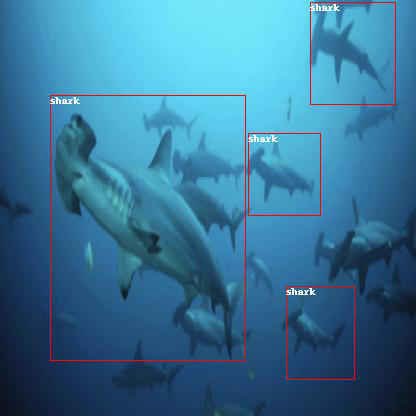

In [13]:
draw = ImageDraw.Draw(image, 'RGBA')

for anno in img_with_annos['annos']:
    bbox = anno['bbox']
    xmin, ymin, w, h = tuple(bbox)
    draw.rectangle((xmin, ymin, xmin+w, ymin+h), outline='red', width=1)
    draw.text((xmin, ymin), categories[anno['category_id']], fill='white')

image